**Final Project for the Elephants Team**

John Quinlan, Bee Xiong, Nick Sigwanz & Michael Olson

ICS 352-50

Credit Score Predictor

We used https://www.kaggle.com/datasets/parisrohan/credit-score-classification?resource=download for the dataset, and from sklearn.ensemble we used the Random Forest Classifier for the algorithm.

The project aims to estimate whether or not an individual will get a loan based on their annual income, the number of credit inquiries associated with their account, their average monthly balance in their checking account and the amount of outstanding debt they have.

In [ ]:
# https://www.kaggle.com/datasets/parisrohan/credit-score-classification?resource=download

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from google.colab import files

In [ ]:
# Load in data
uploaded = files.upload()
df = pd.read_csv('test.csv')
df_clean = df[["Annual_Income", "Num_Credit_Inquiries", "Monthly_Balance", "Outstanding_Debt", "Credit_Mix"]]
df_clean
df_clean.info()

Saving test.csv to test.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Annual_Income         50000 non-null  object 
 1   Num_Credit_Inquiries  48965 non-null  float64
 2   Monthly_Balance       49438 non-null  object 
 3   Outstanding_Debt      50000 non-null  object 
 4   Credit_Mix            50000 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.9+ MB


In [ ]:
# remove all rolls with none value
df_clean = df_clean.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48419 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Annual_Income         48419 non-null  object 
 1   Num_Credit_Inquiries  48419 non-null  float64
 2   Monthly_Balance       48419 non-null  object 
 3   Outstanding_Debt      48419 non-null  object 
 4   Credit_Mix            48419 non-null  object 
dtypes: float64(1), object(4)
memory usage: 2.2+ MB


In [ ]:
# check column "Credit_Mix" for unwated value
df_clean["Credit_Mix"].value_counts()

Standard    17845
Good        11890
_            9507
Bad          9177
Name: Credit_Mix, dtype: int64

In [ ]:
# showing the result
df_clean["Credit_Mix"].value_counts()

Standard    17845
Good        11890
_            9507
Bad          9177
Name: Credit_Mix, dtype: int64

In [ ]:
# remove unwanted value
df_clean = df_clean[df_clean["Credit_Mix"].str.contains("_") == False]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38912 entries, 0 to 49998
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Annual_Income         38912 non-null  object 
 1   Num_Credit_Inquiries  38912 non-null  float64
 2   Monthly_Balance       38912 non-null  object 
 3   Outstanding_Debt      38912 non-null  object 
 4   Credit_Mix            38912 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.8+ MB


In [ ]:
# a function that checks a value to see if it can be converted to a float number
def try_float(value):
    try:
      return float(value)
    except ValueError:
      return "_"

In [ ]:
# iterate through the dataframe to set unwanted value to NAN
for ind in range(df_clean.shape[0]):
    annual_income = df_clean.iat[ind, 0]
    monthly_balance = df_clean.iat[ind, 2]
    outstanding_debt = df_clean.iat[ind, 3]

    x = try_float(annual_income)
    if x == "_":
      df_clean = df_clean.replace(annual_income, np.nan)

    x = try_float(monthly_balance)
    if x == "_":
      df_clean = df_clean.replace(monthly_balance, np.nan)

    x = try_float(outstanding_debt)
    if x == "_":
      df_clean = df_clean.replace(outstanding_debt, np.nan)


In [ ]:
# showing the result
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38912 entries, 0 to 49998
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Annual_Income         36178 non-null  object 
 1   Num_Credit_Inquiries  38912 non-null  float64
 2   Monthly_Balance       38908 non-null  object 
 3   Outstanding_Debt      38513 non-null  object 
 4   Credit_Mix            38912 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.8+ MB


In [ ]:
# remove all rows that has a none value
df_clean = df_clean.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35797 entries, 0 to 49998
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Annual_Income         35797 non-null  object 
 1   Num_Credit_Inquiries  35797 non-null  float64
 2   Monthly_Balance       35797 non-null  object 
 3   Outstanding_Debt      35797 non-null  object 
 4   Credit_Mix            35797 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.6+ MB


In [ ]:
# change column "Credit_Mix" value to numbers
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_clean["Credit_Mix"] = le.fit_transform(df_clean["Credit_Mix"])

In [ ]:
# change all column data type to float64
df_clean = df_clean.astype(float)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35797 entries, 0 to 49998
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Annual_Income         35797 non-null  float64
 1   Num_Credit_Inquiries  35797 non-null  float64
 2   Monthly_Balance       35797 non-null  float64
 3   Outstanding_Debt      35797 non-null  float64
 4   Credit_Mix            35797 non-null  float64
dtypes: float64(5)
memory usage: 1.6 MB


In [ ]:
df_clean

,Annual_Income,Num_Credit_Inquiries,Monthly_Balance,Outstanding_Debt,Credit_Mix
0,19114.12,2022.0,186.266702,809.98,1.0
1,19114.12,4.0,361.444004,809.98,1.0
2,19114.12,4.0,264.675446,809.98,1.0
3,19114.12,4.0,343.826873,809.98,1.0
4,34847.84,5.0,485.298434,605.03,1.0
...,...,...,...,...,...
49993,20002.88,12.0,350.231473,3571.70,0.0
49994,20002.88,12.0,341.179047,3571.70,0.0
49996,39628.99,7.0,409.394562,502.38,1.0
49997,39628.99,7.0,349.726332,502.38,1.0


In [ ]:
X = df_clean[["Annual_Income", "Num_Credit_Inquiries", "Monthly_Balance", "Outstanding_Debt"]]
Y = df_clean["Credit_Mix"]

<Axes: xlabel='Annual_Income', ylabel='Monthly_Balance'>

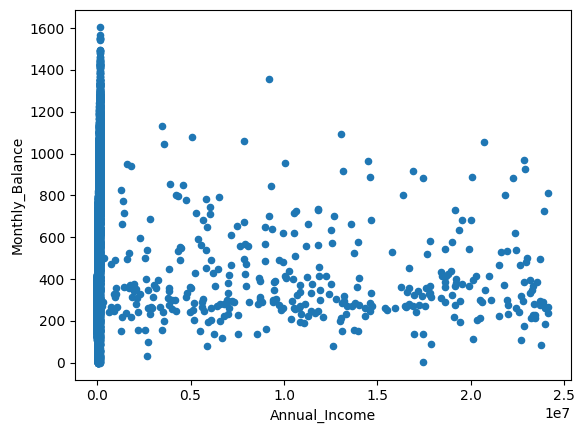

In [71]:
# visualizing preprcessed data 
# scatter plot showing annual income vs monthly balance
df_clean.plot(x = "Annual_Income", y = "Monthly_Balance",  kind = "scatter")

<Axes: xlabel='Num_Credit_Inquiries', ylabel='Outstanding_Debt'>

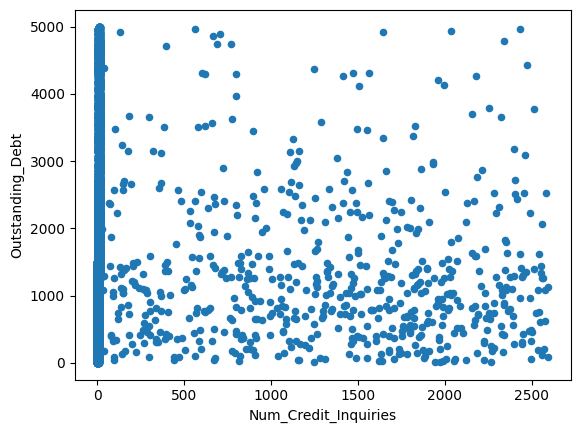

In [72]:
#scatter plot showing credit inquiries vs debts
df_clean.plot(x = "Num_Credit_Inquiries", y = "Outstanding_Debt",  kind = "scatter")

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.25, random_state=1)

# Random Forest Classifier Test# 

In [ ]:
clf_random = RandomForestClassifier()
clf_random.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
predicted_train = clf_random.predict(X_train)
predicted_test = clf_random.predict(X_test)

In [ ]:
print("Results for training data with Random Forest")
print(classification_report(Y_train, predicted_train))

Results for training data with Random Forest
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6292
         1.0       1.00      1.00      1.00      8238
         2.0       1.00      1.00      1.00     12317

    accuracy                           1.00     26847
   macro avg       1.00      1.00      1.00     26847
weighted avg       1.00      1.00      1.00     26847



In [ ]:
print("Results for testing data with Random Forest")
print(classification_report(Y_test, predicted_test))

Results for testing data with Random Forest
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88      2190
         1.0       0.80      0.80      0.80      2698
         2.0       0.80      0.81      0.81      4062

    accuracy                           0.82      8950
   macro avg       0.83      0.83      0.83      8950
weighted avg       0.83      0.82      0.83      8950



In [ ]:
clf_ada = AdaBoostClassifier()
clf_ada.fit(X_train, Y_train)

AdaBoostClassifier()

In [ ]:
predicted_train = clf_ada.predict(X_train)
predicted_test = clf_ada.predict(X_test)

In [ ]:
print("Results for training data with AdaBoostClassifier")
print(classification_report(Y_train, predicted_train))

Results for training data with AdaBoostClassifier
              precision    recall  f1-score   support

         0.0       0.71      0.84      0.77      6292
         1.0       0.59      0.69      0.63      8238
         2.0       0.63      0.51      0.56     12317

    accuracy                           0.64     26847
   macro avg       0.65      0.68      0.66     26847
weighted avg       0.64      0.64      0.63     26847



In [ ]:
print("Results for testing data with AdaBoostClassifier")
print(classification_report(Y_test, predicted_test))

Results for testing data with AdaBoostClassifier
              precision    recall  f1-score   support

         0.0       0.72      0.83      0.77      2190
         1.0       0.59      0.68      0.63      2698
         2.0       0.62      0.51      0.56      4062

    accuracy                           0.64      8950
   macro avg       0.64      0.67      0.65      8950
weighted avg       0.64      0.64      0.63      8950



In [ ]:
clf_GradiB = GradientBoostingClassifier()
clf_GradiB.fit(X_train, Y_train)

GradientBoostingClassifier()

In [ ]:
predicted_train = clf_GradiB.predict(X_train)
predicted_test = clf_GradiB.predict(X_test)

In [ ]:
print("Results for training data with GradientBoostingClassifier")
print(classification_report(Y_train, predicted_train))

In [ ]:
print("Results for testing data with GradientBoostingClassifier")
print(classification_report(Y_test, predicted_test))

Results for testing data with GradientBoostingClassifier
              precision    recall  f1-score   support

         0.0       0.81      0.80      0.80      2190
         1.0       0.67      0.72      0.69      2698
         2.0       0.69      0.67      0.68      4062

    accuracy                           0.71      8950
   macro avg       0.73      0.73      0.73      8950
weighted avg       0.72      0.71      0.71      8950



In [ ]:
# GRID SEARCH WIth Cross validation for Random forest

clf_rand = RandomForestClassifier(random_state=9090)
param_grid = {
    'n_estimators': [10, 100, 200],
    'max_depth': [None, 10, 20],
    
}

gs = GridSearchCV(clf_rand, param_grid=param_grid, cv=5)
gs.fit(X_train, Y_train)

In [ ]:
print('Best params', gs.best_params_)

In [ ]:
print('Best acuracy', gs.best_score_)

Best acuracy 0.8075393293384014


In [ ]:
# create a new random forest classifier using the best parameters that were
# discovered using the grid search above.
clf = RandomForestClassifier(**gs.best_params_)
clf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
predicted_train = clf_random.predict(X_train)
predicted_test = clf_random.predict(X_test)

In [ ]:
print("Results for testing data with Random Forest")
print(classification_report(Y_test, predicted_test))

Resutls for testing data with Random Forest
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88      2190
         1.0       0.80      0.80      0.80      2698
         2.0       0.80      0.81      0.81      4062

    accuracy                           0.82      8950
   macro avg       0.83      0.83      0.83      8950
weighted avg       0.82      0.82      0.82      8950



In [ ]:
# this is cross validation only but without hyper parameter tuning
rf = RandomForestClassifier(random_state=9090 ) 
scores = cross_val_score(rf, X_train, Y_train, cv=5)
print(scores)

[0.8027933  0.79739292 0.80499162 0.81374558 0.80294282]


Text(0.5, 427.9555555555555, 'Predicted diagnosis')

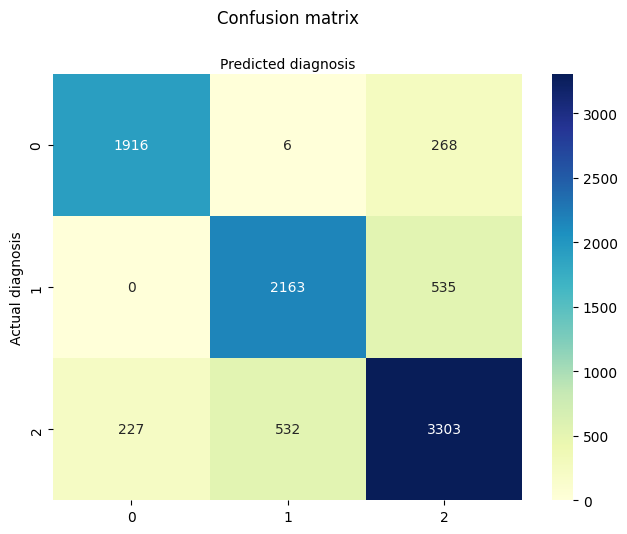

In [64]:

from sklearn import metrics
import seaborn as sns
# Create the Confusion Matrix

cnf_matrix = metrics.confusion_matrix(Y_test, predicted_test)

# Visualizing the Confusion Matrix
class_names = [0,1] # Our diagnosis categories

fig, ax = plt.subplots()
# Setting up and visualizing the plot (do not worry about the code below!)
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') # Creating heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual diagnosis')
plt.xlabel('Predicted diagnosis')

In conclusion, using the random forest classification algorithm, we seem to be 80% accurate with how often an individual will get a loan based on their annual income, the number of credit inquiries associated with their account, their average monthly balance in their checking account and the amount of outstanding debt they have.

